In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [82]:
data = pd.read_csv('/content/data_logistic.cvs').values
N, d = data.shape
# 20 , 3

In [83]:
x = data[:, 0:d-1].reshape(-1, d-1) # Luong va kinh nghiem
y = data[:, 2].reshape(-1,1) # Cho vay hay khong
y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [84]:
x[:10,1]

array([1. , 2. , 1.8, 1. , 2. , 0.5, 3. , 2.5, 1. , 2.5])

Text(0, 0.5, 'Kinh nghiem')

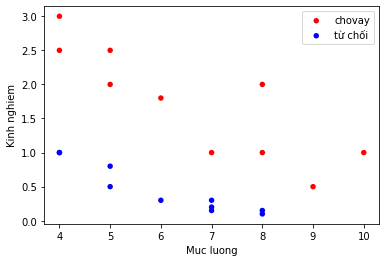

In [85]:
plt.scatter(x[:10,0], x[:10,1], c='red', edgecolors='none', s=30, label='chovay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('Muc luong')
plt.ylabel('Kinh nghiem')

In [86]:
x = np.hstack((np.ones((N, 1)), x))
x

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

In [91]:
x = np.delete(x, 0,1)
x

array([[10.  ,  1.  ],
       [ 5.  ,  2.  ],
       [ 6.  ,  1.8 ],
       [ 7.  ,  1.  ],
       [ 8.  ,  2.  ],
       [ 9.  ,  0.5 ],
       [ 4.  ,  3.  ],
       [ 5.  ,  2.5 ],
       [ 8.  ,  1.  ],
       [ 4.  ,  2.5 ],
       [ 8.  ,  0.1 ],
       [ 7.  ,  0.15],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.8 ],
       [ 7.  ,  0.3 ],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.5 ],
       [ 6.  ,  0.3 ],
       [ 7.  ,  0.2 ],
       [ 8.  ,  0.15]])

In [ ]:
w = np.array([0., 0.1, 0.1]).reshape(-1,1)
# so lan lap buoc 2
num = 1000
cost = np.zeros((num, 1))
learning_rate = 0.01

for i in range(1, num):
  y_pre = sigmoid(np.dot(x,w))
  cost[i] = -np.sum(np.multiply(y, np.log(y_pre)) + np.multiply(1-y, np.log(1-y_pre)))
  #GD
  w = w - learning_rate*np.dot(x.T, y_pre-y)
  print(cost[i])

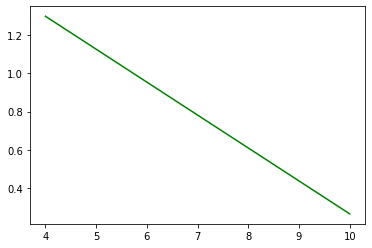

In [88]:
# ve duong phan cach
t = 0.5

plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

In [ ]:
# Phai xoa cot 1 nay thhem vao de data ve lai kieu ban dau
x = np.delete(x, 0,1)
x

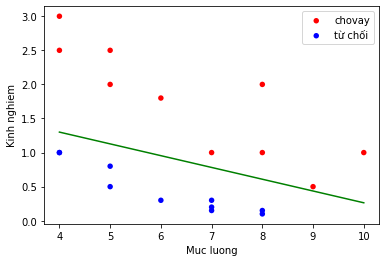

In [92]:
plt.scatter(x[:10,0], x[:10,1], c='red', edgecolors='none', s=30, label='chovay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('Muc luong')
plt.ylabel('Kinh nghiem')
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
y_pre = model.predict(x)

In [105]:
accuracy_score(y, y_pre)

1.0